In [1]:
import scanpy as sc
import pandas as pd
import pickle
import scnsbm
import time
import anndata
import sklearn.metrics
import statistics
%matplotlib notebook
%pylab

/usr/lib/python3/dist-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/usr/lib/python3/dist-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/usr/lib/python3/dist-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/usr/lib/python3/dist-packages/graph_tool/all.py:40: RuntimeWarning: Error importing draw module, proceeding nevertheless: /usr/lib/python3/dist-packages/cairo/_cairo.cpython-37m-x86_64-linux-gnu.so: undefined symbol: cairo_tee_surface_index
  warnings.warn(msg, RuntimeWarning)


Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [7]:
adata=sc.read('mi_10x/adata_base.h5ad')

In [8]:
nei=[x for x in range(5,51,5)]
adatone=[]
for x in nei:
    adata=sc.read('mi_10x/adata_base.h5ad')
    sc.pp.neighbors(adata, n_neighbors=x, n_pcs=40)
    adatone.append(adata)
adatone[0].write('hworkcovid_10x/adata_5.h5ad')
adatone[1].write('hworkcovid_10x/adata_10.h5ad')
adatone[2].write('hworkcovid_10x/adata_15.h5ad')
adatone[3].write('hworkcovid_10x/adata_20.h5ad')
adatone[4].write('hworkcovid_10x/adata_25.h5ad')
adatone[5].write('hworkcovid_10x/adata_30.h5ad')
adatone[6].write('hworkcovid_10x/adata_35.h5ad')
adatone[7].write('hworkcovid_10x/adata_40.h5ad')
adatone[8].write('hworkcovid_10x/adata_45.h5ad')
adatone[9].write('hworkcovid_10x/adata_50.h5ad')

In [9]:
cell_annotation= pd.read_table('matrix_mixology/sc_10x_5cl.metadata.csv.gz', compression="gzip", sep=",", index_col=0)

/home/morelli/anaconda3/envs/scnsbm/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


In [10]:
for i in range(len(adatone)):
    adatone[i].obs.loc[:, "cell_line"] = cell_annotation.loc[adatone[i].obs_names, "cell_line"]

In [11]:
adatone[0].write('hworkcovid_10x/adata_5.h5ad')
adatone[1].write('hworkcovid_10x/adata_10.h5ad')
adatone[2].write('hworkcovid_10x/adata_15.h5ad')
adatone[3].write('hworkcovid_10x/adata_20.h5ad')
adatone[4].write('hworkcovid_10x/adata_25.h5ad')
adatone[5].write('hworkcovid_10x/adata_30.h5ad')
adatone[6].write('hworkcovid_10x/adata_35.h5ad')
adatone[7].write('hworkcovid_10x/adata_40.h5ad')
adatone[8].write('hworkcovid_10x/adata_45.h5ad')
adatone[9].write('hworkcovid_10x/adata_50.h5ad')

... storing 'cell_line' as categorical
... storing 'cell_line' as categorical
... storing 'cell_line' as categorical
... storing 'cell_line' as categorical
... storing 'cell_line' as categorical
... storing 'cell_line' as categorical
... storing 'cell_line' as categorical
... storing 'cell_line' as categorical
... storing 'cell_line' as categorical
... storing 'cell_line' as categorical


In [12]:
adata5=sc.read('hworkcovid_10x/adata_5.h5ad')
adata10=sc.read('hworkcovid_10x/adata_10.h5ad')
adata15=sc.read('hworkcovid_10x/adata_15.h5ad')
adata20=sc.read('hworkcovid_10x/adata_20.h5ad')
adata25=sc.read('hworkcovid_10x/adata_25.h5ad')
adata30=sc.read('hworkcovid_10x/adata_30.h5ad')
adata35=sc.read('hworkcovid_10x/adata_35.h5ad')
adata40=sc.read('hworkcovid_10x/adata_40.h5ad')
adata45=sc.read('hworkcovid_10x/adata_45.h5ad')
adata50=sc.read('hworkcovid_10x/adata_50.h5ad')

# ADATA5

In [16]:
scnsbm.inference.nested_model(adata5,collect_marginals=False)
adata5.write('hworkcovid_10x/adata_5a.h5ad')
scnsbm.inference.nested_model(adata5,collect_marginals=False)
adata5.write('hworkcovid_10x/adata_5b.h5ad')
scnsbm.inference.nested_model(adata5,collect_marginals=False)
adata5.write('hworkcovid_10x/adata_5c.h5ad')
scnsbm.inference.nested_model(adata5,collect_marginals=False)
adata5.write('hworkcovid_10x/adata_5d.h5ad')
scnsbm.inference.nested_model(adata5,collect_marginals=False)
adata5.write('hworkcovid_10x/adata_5e.h5ad')

In [4]:
adata5a=sc.read('hworkcovid_10x/adata_5a.h5ad')
adata5b=sc.read('hworkcovid_10x/adata_5b.h5ad')
adata5c=sc.read('hworkcovid_10x/adata_5c.h5ad')
adata5d=sc.read('hworkcovid_10x/adata_5d.h5ad')
adata5e=sc.read('hworkcovid_10x/adata_5e.h5ad')

### MI 5

In [5]:
nsbm_levels = [x for x in adata5a.obs_keys() if x.startswith("nsbm")]
foobars=['foobar5a','foobar5b','foobar5c','foobar5d','foobar5e']

In [6]:
foobar5a= [sklearn.metrics.adjusted_mutual_info_score(adata5a.obs.loc[:, NL], adata5a.obs.loc[:, 'cell_line'])
                                            for NL in nsbm_levels]
foobar5b= [sklearn.metrics.adjusted_mutual_info_score(adata5b.obs.loc[:, NL], adata5b.obs.loc[:, 'cell_line'])
                                            for NL in nsbm_levels]
foobar5c= [sklearn.metrics.adjusted_mutual_info_score(adata5c.obs.loc[:, NL], adata5c.obs.loc[:, 'cell_line'])
                                            for NL in nsbm_levels]
foobar5d= [sklearn.metrics.adjusted_mutual_info_score(adata5d.obs.loc[:, NL], adata5d.obs.loc[:, 'cell_line'])
                                            for NL in nsbm_levels]
foobar5e= [sklearn.metrics.adjusted_mutual_info_score(adata5e.obs.loc[:, NL], adata5e.obs.loc[:, 'cell_line'])
                                            for NL in nsbm_levels]

/home/morelli/anaconda3/envs/scnsbm/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/morelli/anaconda3/envs/scnsbm/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/morelli/anaconda3/envs/scnsbm/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/morelli/anaconda3/envs/scnsbm/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI wil

In [7]:
MI_5=pd.DataFrame(None,columns=foobars,index=nsbm_levels)
MI_5.loc[:,'foobar5a']=foobar5a
MI_5.loc[:,'foobar5b']=foobar5b
MI_5.loc[:,'foobar5c']=foobar5c
MI_5.loc[:,'foobar5d']=foobar5d
MI_5.loc[:,'foobar5e']=foobar5e

In [32]:
mean_5=[mean(MI_5.iloc[x,:]) for x in range(len(nsbm_levels))]
sd_5=[statistics.stdev(MI_5.iloc[x,:]) for x in range(len(nsbm_levels))]
MI_5['mean_5']=mean_5
MI_5['standard_deviation_5']=sd_5

In [22]:
pickle.dump(MI_5, open('hworkcovid_10x/mi_5.pkl','wb'),2)

In [33]:
MI_5

,foobar5a,foobar5b,foobar5c,foobar5d,foobar5e,mean_5,standard_deviation_5
nsbm_level_1,6.431254e-01,6.495369e-01,6.449558e-01,6.527062e-01,6.169236e-01,5.709212e-01,1.512781e-01
nsbm_level_2,7.977649e-01,7.977649e-01,7.977649e-01,7.910392e-01,8.813897e-01,7.232444e-01,1.959958e-01
nsbm_level_3,7.977649e-01,3.760101e-01,3.760101e-01,3.550662e-01,5.490989e-01,4.419062e-01,1.901564e-01
nsbm_level_4,4.347903e-01,3.760101e-01,-5.897479e-16,3.550662e-01,2.054833e-01,2.541757e-01,1.505408e-01
nsbm_level_5,-5.897479e-16,3.760101e-01,-5.897479e-16,3.550662e-01,2.054833e-01,1.818393e-01,1.502574e-01
nsbm_level_6,-5.897479e-16,3.760101e-01,-5.897479e-16,3.550662e-01,2.054833e-01,1.818393e-01,1.502574e-01
nsbm_level_7,-5.897479e-16,3.760101e-01,-5.897479e-16,3.550662e-01,2.054833e-01,1.818393e-01,1.502574e-01
nsbm_level_8,-5.897479e-16,-5.897479e-16,-5.897479e-16,3.550662e-01,2.054833e-01,1.162522e-01,1.328280e-01
nsbm_level_9,-5.897479e-16,-5.897479e-16,-5.897479e-16,-5.897479e-16,-5.897479e-16,-4.616192e-16,3.034748e-16


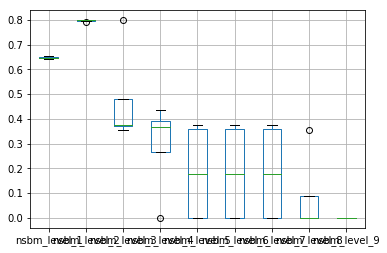

In [120]:
MI_5.iloc[:,0:4].T.boxplot()

# ADATA10

In [17]:
scnsbm.inference.nested_model(adata10,collect_marginals=False)
adata10.write('hworkcovid_10x/adata_10a.h5ad')
scnsbm.inference.nested_model(adata10,collect_marginals=False)
adata10.write('hworkcovid_10x/adata_10b.h5ad')
scnsbm.inference.nested_model(adata10,collect_marginals=False)
adata10.write('hworkcovid_10x/adata_10c.h5ad')
scnsbm.inference.nested_model(adata10,collect_marginals=False)
adata10.write('hworkcovid_10x/adata_10d.h5ad')
scnsbm.inference.nested_model(adata10,collect_marginals=False)
adata10.write('hworkcovid_10x/adata_10e.h5ad')

In [24]:
adata10a=sc.read('hworkcovid_10x/adata_10a.h5ad')
adata10b=sc.read('hworkcovid_10x/adata_10b.h5ad')
adata10c=sc.read('hworkcovid_10x/adata_10c.h5ad')
adata10d=sc.read('hworkcovid_10x/adata_10d.h5ad')
adata10e=sc.read('hworkcovid_10x/adata_10e.h5ad')

### MI_10

In [25]:
nsbm_levels = [x for x in adata10a.obs_keys() if x.startswith("nsbm")]
foobars=['foobar10a','foobar10b','foobar10c','foobar10d','foobar10e']

In [26]:
foobar10a= [sklearn.metrics.adjusted_mutual_info_score(adata10a.obs.loc[:, NL], adata10a.obs.loc[:, 'cell_line'])
                                            for NL in nsbm_levels]
foobar10b= [sklearn.metrics.adjusted_mutual_info_score(adata10b.obs.loc[:, NL], adata10b.obs.loc[:, 'cell_line'])
                                            for NL in nsbm_levels]
foobar10c= [sklearn.metrics.adjusted_mutual_info_score(adata10c.obs.loc[:, NL], adata10c.obs.loc[:, 'cell_line'])
                                            for NL in nsbm_levels]
foobar10d= [sklearn.metrics.adjusted_mutual_info_score(adata10d.obs.loc[:, NL], adata10d.obs.loc[:, 'cell_line'])
                                            for NL in nsbm_levels]
foobar10e= [sklearn.metrics.adjusted_mutual_info_score(adata10e.obs.loc[:, NL], adata10e.obs.loc[:, 'cell_line'])
                                            for NL in nsbm_levels]

/home/morelli/anaconda3/envs/scnsbm/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/morelli/anaconda3/envs/scnsbm/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/morelli/anaconda3/envs/scnsbm/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/morelli/anaconda3/envs/scnsbm/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI wil

In [27]:
MI_10=pd.DataFrame(None,columns=foobars,index=nsbm_levels)
MI_10.loc[:,'foobar10a']=foobar10a
MI_10.loc[:,'foobar10b']=foobar10b
MI_10.loc[:,'foobar10c']=foobar10c
MI_10.loc[:,'foobar10d']=foobar10d
MI_10.loc[:,'foobar10e']=foobar10e

In [29]:
mean_10=[mean(MI_10.iloc[x,:]) for x in range(len(nsbm_levels))]
sd_10=[statistics.stdev(MI_10.iloc[x,:]) for x in range(len(nsbm_levels))]
MI_10['mean_10']=mean_10
MI_10['standard_deviation_10']=sd_10

In [34]:
pickle.dump(MI_10, open('hworkcovid_10x/mi_10.pkl','wb'),2)

In [30]:
MI_10

,foobar10a,foobar10b,foobar10c,foobar10d,foobar10e,mean_10,standard_deviation_10
nsbm_level_1,5.424755e-01,5.441639e-01,0.516139,0.540301,5.295595e-01,0.534528,0.011749
nsbm_level_2,7.694152e-01,9.521213e-01,0.786943,0.819426,9.521213e-01,0.856005,0.089557
nsbm_level_3,6.229178e-01,7.056654e-01,0.791039,0.791039,6.295874e-01,0.708050,0.082438
nsbm_level_4,4.240783e-01,5.532450e-01,0.377303,0.377303,4.399969e-01,0.434385,0.072080
nsbm_level_5,-5.897479e-16,4.069100e-01,0.377303,0.377303,4.399969e-01,0.320303,0.180914
nsbm_level_6,-5.897479e-16,-5.897479e-16,0.377303,0.377303,4.399969e-01,0.238921,0.219600
nsbm_level_7,-5.897479e-16,-5.897479e-16,0.377303,0.377303,4.399969e-01,0.238921,0.219600
nsbm_level_8,-5.897479e-16,-5.897479e-16,0.377303,0.377303,-5.897479e-16,0.150921,0.206657
nsbm_level_9,-5.897479e-16,-5.897479e-16,0.377303,0.377303,-5.897479e-16,0.150921,0.206657


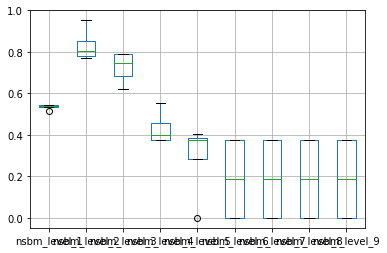

In [119]:
MI_10.iloc[:,0:4].T.boxplot()

 # ADATA15

In [18]:
scnsbm.inference.nested_model(adata15,collect_marginals=False)
adata15.write('hworkcovid_10x/adata_15a.h5ad')
scnsbm.inference.nested_model(adata15,collect_marginals=False)
adata15.write('hworkcovid_10x/adata_15b.h5ad')
scnsbm.inference.nested_model(adata15,collect_marginals=False)
adata15.write('hworkcovid_10x/adata_15c.h5ad')
scnsbm.inference.nested_model(adata15,collect_marginals=False)
adata15.write('hworkcovid_10x/adata_15d.h5ad')
scnsbm.inference.nested_model(adata15,collect_marginals=False)
adata15.write('hworkcovid_10x/adata_15e.h5ad')

In [35]:
adata15a=sc.read('hworkcovid_10x/adata_15a.h5ad')
adata15b=sc.read('hworkcovid_10x/adata_15b.h5ad')
adata15c=sc.read('hworkcovid_10x/adata_15c.h5ad')
adata15d=sc.read('hworkcovid_10x/adata_15d.h5ad')
adata15e=sc.read('hworkcovid_10x/adata_15e.h5ad')

### MI_15

In [36]:
nsbm_levels = [x for x in adata15a.obs_keys() if x.startswith("nsbm")]
foobars=['foobar15a','foobar15b','foobar15c','foobar15d','foobar15e']

In [37]:
foobar15a= [sklearn.metrics.adjusted_mutual_info_score(adata15a.obs.loc[:, NL], adata15a.obs.loc[:, 'cell_line'])
                                            for NL in nsbm_levels]
foobar15b= [sklearn.metrics.adjusted_mutual_info_score(adata15b.obs.loc[:, NL], adata15b.obs.loc[:, 'cell_line'])
                                            for NL in nsbm_levels]
foobar15c= [sklearn.metrics.adjusted_mutual_info_score(adata15c.obs.loc[:, NL], adata15c.obs.loc[:, 'cell_line'])
                                            for NL in nsbm_levels]
foobar15d= [sklearn.metrics.adjusted_mutual_info_score(adata15d.obs.loc[:, NL], adata15d.obs.loc[:, 'cell_line'])
                                            for NL in nsbm_levels]
foobar15e= [sklearn.metrics.adjusted_mutual_info_score(adata15e.obs.loc[:, NL], adata15e.obs.loc[:, 'cell_line'])
                                            for NL in nsbm_levels]

/home/morelli/anaconda3/envs/scnsbm/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/morelli/anaconda3/envs/scnsbm/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/morelli/anaconda3/envs/scnsbm/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/morelli/anaconda3/envs/scnsbm/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI wil

In [38]:
MI_15=pd.DataFrame(None,columns=foobars,index=nsbm_levels)
MI_15.loc[:,'foobar15a']=foobar15a
MI_15.loc[:,'foobar15b']=foobar15b
MI_15.loc[:,'foobar15c']=foobar15c
MI_15.loc[:,'foobar15d']=foobar15d
MI_15.loc[:,'foobar15e']=foobar15e

In [39]:
mean_15=[mean(MI_15.iloc[x,:]) for x in range(len(nsbm_levels))]
sd_15=[statistics.stdev(MI_15.iloc[x,:]) for x in range(len(nsbm_levels))]
MI_15['mean_15']=mean_15
MI_15['standard_deviation_15']=sd_15

In [41]:
pickle.dump(MI_15, open('hworkcovid_10x/mi_15.pkl','wb'),2)

In [40]:
MI_15

,foobar15a,foobar15b,foobar15c,foobar15d,foobar15e,mean_15,standard_deviation_15
nsbm_level_1,4.872670e-01,4.979803e-01,4.842544e-01,4.956176e-01,5.177827e-01,4.965804e-01,0.013144
nsbm_level_2,9.059961e-01,7.367716e-01,6.862413e-01,7.961894e-01,7.382321e-01,7.726861e-01,0.084074
nsbm_level_3,6.850207e-01,7.036246e-01,7.910392e-01,8.108949e-01,7.032771e-01,7.387713e-01,0.057702
nsbm_level_4,4.399969e-01,4.069100e-01,3.773028e-01,4.187989e-01,4.069100e-01,4.099837e-01,0.022724
nsbm_level_5,-5.897479e-16,-5.897479e-16,-5.897479e-16,4.187989e-01,-5.897479e-16,8.375978e-02,0.187293
nsbm_level_6,-5.897479e-16,-5.897479e-16,-5.897479e-16,4.187989e-01,-5.897479e-16,8.375978e-02,0.187293
nsbm_level_7,-5.897479e-16,-5.897479e-16,-5.897479e-16,4.187989e-01,-5.897479e-16,8.375978e-02,0.187293
nsbm_level_8,-5.897479e-16,-5.897479e-16,-5.897479e-16,-5.897479e-16,-5.897479e-16,-5.897479e-16,0.000000
nsbm_level_9,-5.897479e-16,-5.897479e-16,-5.897479e-16,-5.897479e-16,-5.897479e-16,-5.897479e-16,0.000000


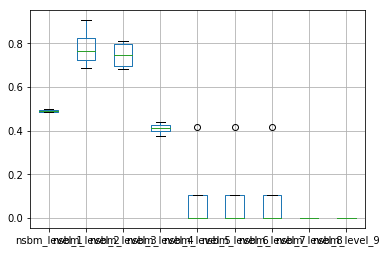

In [118]:
MI_15.iloc[:,0:4].T.boxplot()

# ADATA20

In [19]:
scnsbm.inference.nested_model(adata20,collect_marginals=False)
adata20.write('hworkcovid_10x/adata_20a.h5ad')
scnsbm.inference.nested_model(adata20,collect_marginals=False)
adata20.write('hworkcovid_10x/adata_20b.h5ad')
scnsbm.inference.nested_model(adata20,collect_marginals=False)
adata20.write('hworkcovid_10x/adata_20c.h5ad')
scnsbm.inference.nested_model(adata20,collect_marginals=False)
adata20.write('hworkcovid_10x/adata_20d.h5ad')
scnsbm.inference.nested_model(adata20,collect_marginals=False)
adata20.write('hworkcovid_10x/adata_20e.h5ad')

In [42]:
adata20a=sc.read('hworkcovid_10x/adata_20a.h5ad')
adata20b=sc.read('hworkcovid_10x/adata_20b.h5ad')
adata20c=sc.read('hworkcovid_10x/adata_20c.h5ad')
adata20d=sc.read('hworkcovid_10x/adata_20d.h5ad')
adata20e=sc.read('hworkcovid_10x/adata_20e.h5ad')

### MI_20

In [43]:
nsbm_levels = [x for x in adata20a.obs_keys() if x.startswith("nsbm")]
foobars=['foobar20a','foobar20b','foobar20c','foobar20d','foobar20e']

In [44]:
foobar20a= [sklearn.metrics.adjusted_mutual_info_score(adata20a.obs.loc[:, NL], adata20a.obs.loc[:, 'cell_line'])
                                            for NL in nsbm_levels]
foobar20b= [sklearn.metrics.adjusted_mutual_info_score(adata20b.obs.loc[:, NL], adata20b.obs.loc[:, 'cell_line'])
                                            for NL in nsbm_levels]
foobar20c= [sklearn.metrics.adjusted_mutual_info_score(adata20c.obs.loc[:, NL], adata20c.obs.loc[:, 'cell_line'])
                                            for NL in nsbm_levels]
foobar20d= [sklearn.metrics.adjusted_mutual_info_score(adata20d.obs.loc[:, NL], adata20d.obs.loc[:, 'cell_line'])
                                            for NL in nsbm_levels]
foobar20e= [sklearn.metrics.adjusted_mutual_info_score(adata20e.obs.loc[:, NL], adata20e.obs.loc[:, 'cell_line'])
                                            for NL in nsbm_levels]

/home/morelli/anaconda3/envs/scnsbm/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/morelli/anaconda3/envs/scnsbm/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/morelli/anaconda3/envs/scnsbm/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/morelli/anaconda3/envs/scnsbm/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI wil

In [45]:
MI_20=pd.DataFrame(None,columns=foobars,index=nsbm_levels)
MI_20.loc[:,'foobar20a']=foobar20a
MI_20.loc[:,'foobar20b']=foobar20b
MI_20.loc[:,'foobar20c']=foobar20c
MI_20.loc[:,'foobar20d']=foobar20d
MI_20.loc[:,'foobar20e']=foobar20e

In [84]:
mean_20=[mean(MI_20.iloc[x,:]) for x in range(len(nsbm_levels))]
sd_20=[statistics.stdev(MI_20.iloc[x,:]) for x in range(len(nsbm_levels))]
MI_20['mean_20']=mean_20
MI_20['standard_deviation_20']=sd_20

In [86]:
pickle.dump(MI_20, open('hworkcovid_10x/mi_20.pkl','wb'),2)

In [85]:
MI_20

,foobar20a,foobar20b,foobar20c,foobar20d,foobar20e,mean_20,standard_deviation_20
nsbm_level_1,4.825438e-01,4.652968e-01,5.069356e-01,4.795150e-01,4.939604e-01,4.856503e-01,0.015682
nsbm_level_2,8.057110e-01,8.000615e-01,8.049934e-01,7.003628e-01,7.375664e-01,7.697390e-01,0.048230
nsbm_level_3,5.977257e-01,8.101602e-01,8.126196e-01,8.496412e-01,8.108949e-01,7.762083e-01,0.101156
nsbm_level_4,4.240783e-01,5.659973e-01,3.831949e-01,6.229178e-01,6.828881e-01,5.358153e-01,0.128361
nsbm_level_5,-5.897479e-16,4.205332e-01,-5.897479e-16,4.240783e-01,4.205332e-01,2.530289e-01,0.230987
nsbm_level_6,-5.897479e-16,4.205332e-01,-5.897479e-16,4.240783e-01,-5.897479e-16,1.689223e-01,0.231310
nsbm_level_7,-5.897479e-16,4.205332e-01,-5.897479e-16,-5.897479e-16,-5.897479e-16,8.410663e-02,0.188068
nsbm_level_8,-5.897479e-16,4.205332e-01,-5.897479e-16,-5.897479e-16,-5.897479e-16,8.410663e-02,0.188068
nsbm_level_9,-5.897479e-16,-5.897479e-16,-5.897479e-16,-5.897479e-16,-5.897479e-16,-5.897479e-16,0.000000


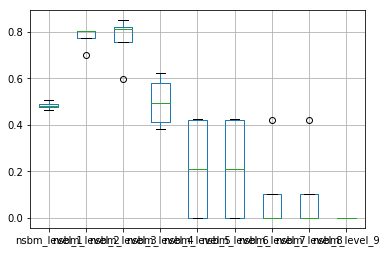

In [121]:
MI_20.iloc[:,0:4].T.boxplot()

# ADATA25

In [20]:
scnsbm.inference.nested_model(adata25,collect_marginals=False)
adata25.write('hworkcovid_10x/adata_25a.h5ad')
scnsbm.inference.nested_model(adata25,collect_marginals=False)
adata25.write('hworkcovid_10x/adata_25b.h5ad')
scnsbm.inference.nested_model(adata25,collect_marginals=False)
adata25.write('hworkcovid_10x/adata_25c.h5ad')
scnsbm.inference.nested_model(adata25,collect_marginals=False)
adata25.write('hworkcovid_10x/adata_25d.h5ad')
scnsbm.inference.nested_model(adata25,collect_marginals=False)
adata25.write('hworkcovid_10x/adata_25e.h5ad')

In [46]:
adata25a=sc.read('hworkcovid_10x/adata_25a.h5ad')
adata25b=sc.read('hworkcovid_10x/adata_25b.h5ad')
adata25c=sc.read('hworkcovid_10x/adata_25c.h5ad')
adata25d=sc.read('hworkcovid_10x/adata_25d.h5ad')
adata25e=sc.read('hworkcovid_10x/adata_25e.h5ad')

### MI_25

In [47]:
nsbm_levels = [x for x in adata25a.obs_keys() if x.startswith("nsbm")]
foobars=['foobar25a','foobar25b','foobar25c','foobar25d','foobar25e']

In [48]:
foobar25a= [sklearn.metrics.adjusted_mutual_info_score(adata25a.obs.loc[:, NL], adata25a.obs.loc[:, 'cell_line'])
                                            for NL in nsbm_levels]
foobar25b= [sklearn.metrics.adjusted_mutual_info_score(adata25b.obs.loc[:, NL], adata25b.obs.loc[:, 'cell_line'])
                                            for NL in nsbm_levels]
foobar25c= [sklearn.metrics.adjusted_mutual_info_score(adata25c.obs.loc[:, NL], adata25c.obs.loc[:, 'cell_line'])
                                            for NL in nsbm_levels]
foobar25d= [sklearn.metrics.adjusted_mutual_info_score(adata25d.obs.loc[:, NL], adata25d.obs.loc[:, 'cell_line'])
                                            for NL in nsbm_levels]
foobar25e= [sklearn.metrics.adjusted_mutual_info_score(adata25e.obs.loc[:, NL], adata25e.obs.loc[:, 'cell_line'])
                                            for NL in nsbm_levels]

/home/morelli/anaconda3/envs/scnsbm/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/morelli/anaconda3/envs/scnsbm/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/morelli/anaconda3/envs/scnsbm/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/morelli/anaconda3/envs/scnsbm/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI wil

In [49]:
MI_25=pd.DataFrame(None,columns=foobars,index=nsbm_levels)
MI_25.loc[:,'foobar25a']=foobar25a
MI_25.loc[:,'foobar25b']=foobar25b
MI_25.loc[:,'foobar25c']=foobar25c
MI_25.loc[:,'foobar25d']=foobar25d
MI_25.loc[:,'foobar25e']=foobar25e

In [81]:
mean_25=[mean(MI_25.iloc[x,:]) for x in range(len(nsbm_levels))]
sd_25=[statistics.stdev(MI_25.iloc[x,:]) for x in range(len(nsbm_levels))]
MI_25['mean_25']=mean_25
MI_25['standard_deviation_25']=sd_25

In [82]:
pickle.dump(MI_25, open('hworkcovid_10x/mi_25.pkl','wb'),2)

In [83]:
MI_25

,foobar25a,foobar25b,foobar25c,foobar25d,foobar25e,mean_25,standard_deviation_25
nsbm_level_1,5.027644e-01,4.866673e-01,4.951642e-01,0.490244,4.928415e-01,0.493536,0.006048
nsbm_level_2,7.112546e-01,7.157260e-01,7.303313e-01,0.702760,7.445530e-01,0.720925,0.016563
nsbm_level_3,8.104263e-01,8.167789e-01,7.607735e-01,0.811367,8.157510e-01,0.803019,0.023773
nsbm_level_4,5.620258e-01,8.101602e-01,6.863445e-01,0.810502,6.863445e-01,0.711075,0.103854
nsbm_level_5,1.655314e-01,4.389568e-01,4.205332e-01,0.810160,3.330700e-01,0.433650,0.236624
nsbm_level_6,1.663716e-01,-5.897479e-16,4.205332e-01,0.562187,-5.897479e-16,0.229818,0.253229
nsbm_level_7,-5.897479e-16,-5.897479e-16,-5.897479e-16,0.562187,-5.897479e-16,0.112437,0.251417
nsbm_level_8,-5.897479e-16,-5.897479e-16,-5.897479e-16,0.438957,-5.897479e-16,0.087791,0.196307
nsbm_level_9,-5.897479e-16,-5.897479e-16,-5.897479e-16,0.438957,-5.897479e-16,0.087791,0.196307


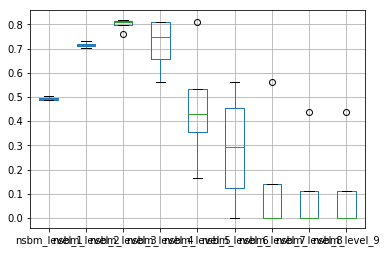

In [116]:
MI_25.iloc[:,0:4].T.boxplot()

# ADATA30

In [21]:
scnsbm.inference.nested_model(adata30,collect_marginals=False)
adata30.write('hworkcovid_10x/adata_30a.h5ad')
scnsbm.inference.nested_model(adata30,collect_marginals=False)
adata30.write('hworkcovid_10x/adata_30b.h5ad')
scnsbm.inference.nested_model(adata30,collect_marginals=False)
adata30.write('hworkcovid_10x/adata_30c.h5ad')
scnsbm.inference.nested_model(adata30,collect_marginals=False)
adata30.write('hworkcovid_10x/adata_30d.h5ad')
scnsbm.inference.nested_model(adata30,collect_marginals=False)
adata30.write('hworkcovid_10x/adata_30e.h5ad')

In [50]:
adata30a=sc.read('hworkcovid_10x/adata_30a.h5ad')
adata30b=sc.read('hworkcovid_10x/adata_30b.h5ad')
adata30c=sc.read('hworkcovid_10x/adata_30c.h5ad')
adata30d=sc.read('hworkcovid_10x/adata_30d.h5ad')
adata30e=sc.read('hworkcovid_10x/adata_30e.h5ad')

### MI_30

In [51]:
nsbm_levels = [x for x in adata30a.obs_keys() if x.startswith("nsbm")]
foobars=['foobar30a','foobar30b','foobar30c','foobar30d','foobar30e']

In [52]:
foobar30a= [sklearn.metrics.adjusted_mutual_info_score(adata30a.obs.loc[:, NL], adata30a.obs.loc[:, 'cell_line'])
                                            for NL in nsbm_levels]
foobar30b= [sklearn.metrics.adjusted_mutual_info_score(adata30b.obs.loc[:, NL], adata30b.obs.loc[:, 'cell_line'])
                                            for NL in nsbm_levels]
foobar30c= [sklearn.metrics.adjusted_mutual_info_score(adata30c.obs.loc[:, NL], adata30c.obs.loc[:, 'cell_line'])
                                            for NL in nsbm_levels]
foobar30d= [sklearn.metrics.adjusted_mutual_info_score(adata30d.obs.loc[:, NL], adata30d.obs.loc[:, 'cell_line'])
                                            for NL in nsbm_levels]
foobar30e= [sklearn.metrics.adjusted_mutual_info_score(adata30e.obs.loc[:, NL], adata30e.obs.loc[:, 'cell_line'])
                                            for NL in nsbm_levels]

/home/morelli/anaconda3/envs/scnsbm/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/morelli/anaconda3/envs/scnsbm/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/morelli/anaconda3/envs/scnsbm/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/morelli/anaconda3/envs/scnsbm/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI wil

In [53]:
MI_30=pd.DataFrame(None,columns=foobars,index=nsbm_levels)
MI_30.loc[:,'foobar30a']=foobar30a
MI_30.loc[:,'foobar30b']=foobar30b
MI_30.loc[:,'foobar30c']=foobar30c
MI_30.loc[:,'foobar30d']=foobar30d
MI_30.loc[:,'foobar30e']=foobar30e

In [87]:
mean_30=[mean(MI_30.iloc[x,:]) for x in range(len(nsbm_levels))]
sd_30=[statistics.stdev(MI_30.iloc[x,:]) for x in range(len(nsbm_levels))]
MI_30['mean_30']=mean_30
MI_30['standard_deviation_30']=sd_30

In [89]:
pickle.dump(MI_30, open('hworkcovid_10x/mi_30.pkl','wb'),2)

In [88]:
MI_30

,foobar30a,foobar30b,foobar30c,foobar30d,foobar30e,mean_30,standard_deviation_30
nsbm_level_1,4.911310e-01,4.950225e-01,4.948012e-01,4.783000e-01,0.515994,0.495050,0.013552
nsbm_level_2,8.569571e-01,9.170356e-01,9.170356e-01,9.129573e-01,0.711275,0.863052,0.088590
nsbm_level_3,6.885091e-01,8.013945e-01,8.157510e-01,7.083915e-01,0.815751,0.765959,0.062303
nsbm_level_4,4.442187e-01,6.016108e-01,6.863445e-01,4.187989e-01,0.688509,0.567896,0.129654
nsbm_level_5,4.442187e-01,2.469667e-01,3.330700e-01,4.187989e-01,0.688509,0.426313,0.165819
nsbm_level_6,-5.897479e-16,-5.897479e-16,-5.897479e-16,-5.897479e-16,0.333070,0.066614,0.148953
nsbm_level_7,-5.897479e-16,-5.897479e-16,-5.897479e-16,-5.897479e-16,0.333070,0.066614,0.148953
nsbm_level_8,-5.897479e-16,-5.897479e-16,-5.897479e-16,-5.897479e-16,0.333070,0.066614,0.148953
nsbm_level_9,-5.897479e-16,-5.897479e-16,-5.897479e-16,-5.897479e-16,0.333070,0.066614,0.148953


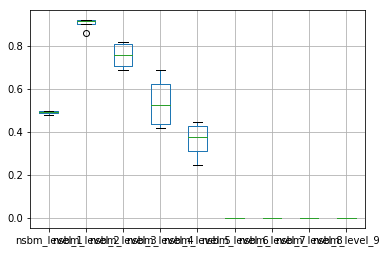

In [115]:
MI_30.iloc[:,0:4].T.boxplot()

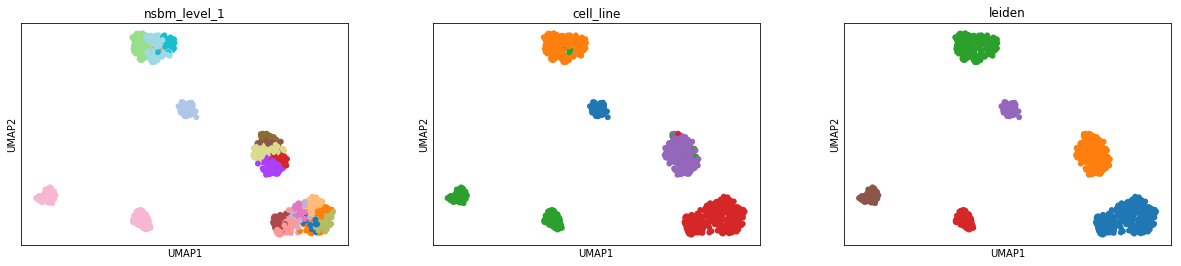

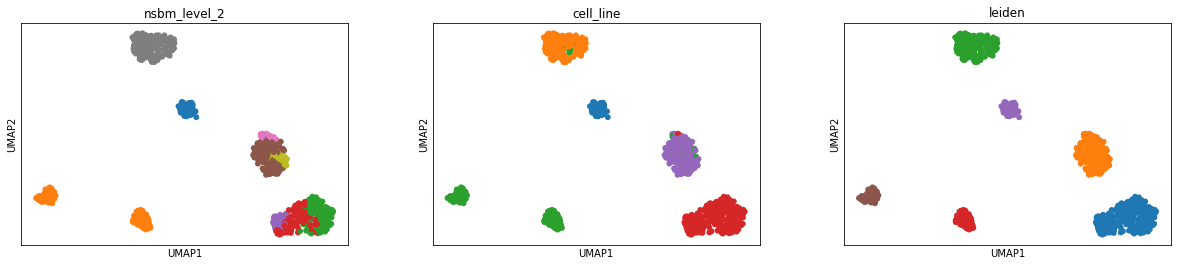

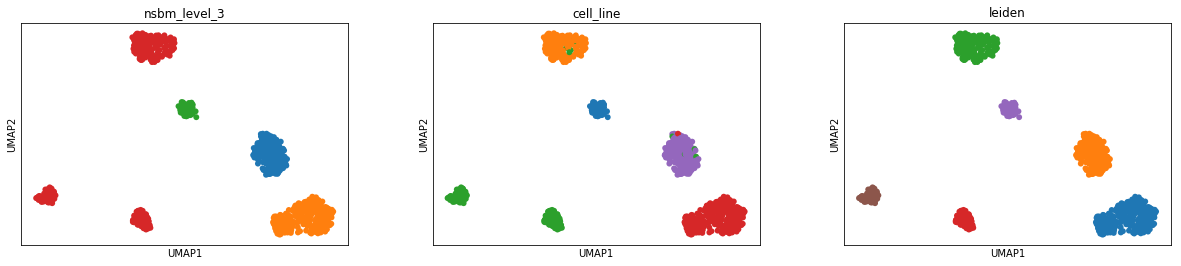

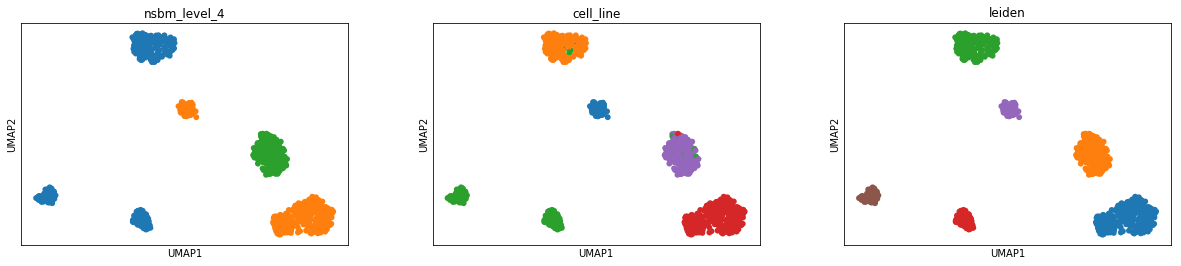

In [126]:
sc.tl.leiden(adata30e, resolution=.5)

sc.tl.umap(adata30e)
sc.pl.umap(adata30e, color=["nsbm_level_1", 'cell_line', 'leiden'], legend_loc='on_data')
sc.pl.umap(adata30e, color=["nsbm_level_2", 'cell_line', 'leiden'], legend_loc='on_data')
sc.pl.umap(adata30e, color=["nsbm_level_3",  'cell_line','leiden'], legend_loc='on_data')
sc.pl.umap(adata30e, color=["nsbm_level_4",  'cell_line','leiden'], legend_loc='on_data')

# ADATA35

In [22]:
scnsbm.inference.nested_model(adata35,collect_marginals=False)
adata35.write('hworkcovid_10x/adata_35a.h5ad')
scnsbm.inference.nested_model(adata35,collect_marginals=False)
adata35.write('hworkcovid_10x/adata_35b.h5ad')
scnsbm.inference.nested_model(adata35,collect_marginals=False)
adata35.write('hworkcovid_10x/adata_35c.h5ad')
scnsbm.inference.nested_model(adata35,collect_marginals=False)
adata35.write('hworkcovid_10x/adata_35d.h5ad')
scnsbm.inference.nested_model(adata35,collect_marginals=False)
adata35.write('hworkcovid_10x/adata_35e.h5ad')

In [54]:
adata35a=sc.read('hworkcovid_10x/adata_35a.h5ad')
adata35b=sc.read('hworkcovid_10x/adata_35b.h5ad')
adata35c=sc.read('hworkcovid_10x/adata_35c.h5ad')
adata35d=sc.read('hworkcovid_10x/adata_35d.h5ad')
adata35e=sc.read('hworkcovid_10x/adata_35e.h5ad')

### MI_35

In [55]:
nsbm_levels = [x for x in adata35a.obs_keys() if x.startswith("nsbm")]
foobars=['foobar35a','foobar35b','foobar35c','foobar35d','foobar35e']

In [56]:
foobar35a= [sklearn.metrics.adjusted_mutual_info_score(adata35a.obs.loc[:, NL], adata35a.obs.loc[:, 'cell_line'])
                                            for NL in nsbm_levels]
foobar35b= [sklearn.metrics.adjusted_mutual_info_score(adata35b.obs.loc[:, NL], adata35b.obs.loc[:, 'cell_line'])
                                            for NL in nsbm_levels]
foobar35c= [sklearn.metrics.adjusted_mutual_info_score(adata35c.obs.loc[:, NL], adata35c.obs.loc[:, 'cell_line'])
                                            for NL in nsbm_levels]
foobar35d= [sklearn.metrics.adjusted_mutual_info_score(adata35d.obs.loc[:, NL], adata35d.obs.loc[:, 'cell_line'])
                                            for NL in nsbm_levels]
foobar35e= [sklearn.metrics.adjusted_mutual_info_score(adata35e.obs.loc[:, NL], adata35e.obs.loc[:, 'cell_line'])
                                            for NL in nsbm_levels]

/home/morelli/anaconda3/envs/scnsbm/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/morelli/anaconda3/envs/scnsbm/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/morelli/anaconda3/envs/scnsbm/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/morelli/anaconda3/envs/scnsbm/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI wil

In [57]:
MI_35=pd.DataFrame(None,columns=foobars,index=nsbm_levels)
MI_35.loc[:,'foobar35a']=foobar35a
MI_35.loc[:,'foobar35b']=foobar35b
MI_35.loc[:,'foobar35c']=foobar35c
MI_35.loc[:,'foobar35d']=foobar35d
MI_35.loc[:,'foobar35e']=foobar35e

In [77]:
mean_35=[mean(MI_35.iloc[x,:]) for x in range(len(nsbm_levels))]
sd_35=[statistics.stdev(MI_35.iloc[x,:]) for x in range(len(nsbm_levels))]
MI_35['mean_35']=mean_35
MI_35['standard_deviation_35']=sd_35

In [79]:
pickle.dump(MI_35, open('hworkcovid_10x/mi_35.pkl','wb'),2)

In [78]:
MI_35

,foobar35a,foobar35b,foobar35c,foobar35d,foobar35e,mean_35,standard_deviation_35
nsbm_level_1,4.962861e-01,4.720062e-01,4.957939e-01,5.042317e-01,4.849696e-01,4.906575e-01,0.012475
nsbm_level_2,8.215706e-01,7.220322e-01,7.772081e-01,8.212796e-01,8.210414e-01,7.926264e-01,0.043839
nsbm_level_3,7.464202e-01,8.040193e-01,7.643524e-01,8.648626e-01,7.442123e-01,7.847733e-01,0.050788
nsbm_level_4,6.474843e-01,5.549338e-01,6.276560e-01,6.728850e-01,7.442123e-01,6.494343e-01,0.068814
nsbm_level_5,3.182820e-01,4.128250e-01,3.916898e-01,4.205332e-01,5.025491e-01,4.091758e-01,0.066008
nsbm_level_6,3.182820e-01,4.128250e-01,-5.897479e-16,4.205332e-01,5.025491e-01,3.308379e-01,0.196127
nsbm_level_7,3.182820e-01,-5.897479e-16,-5.897479e-16,-5.897479e-16,-5.897479e-16,6.365641e-02,0.142340
nsbm_level_8,-5.897479e-16,-5.897479e-16,-5.897479e-16,-5.897479e-16,-5.897479e-16,-5.897479e-16,0.000000
nsbm_level_9,-5.897479e-16,-5.897479e-16,-5.897479e-16,-5.897479e-16,-5.897479e-16,-5.897479e-16,0.000000


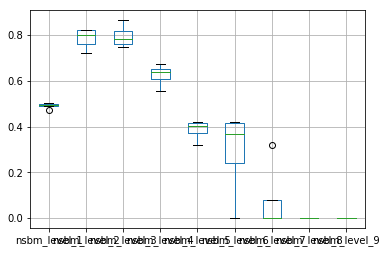

In [114]:
MI_35.iloc[:,0:4].T.boxplot()

# ADATA40

In [23]:
scnsbm.inference.nested_model(adata40,collect_marginals=False)
adata40.write('hworkcovid_10x/adata_40a.h5ad')
scnsbm.inference.nested_model(adata40,collect_marginals=False)
adata40.write('hworkcovid_10x/adata_40b.h5ad')
scnsbm.inference.nested_model(adata40,collect_marginals=False)
adata40.write('hworkcovid_10x/adata_40c.h5ad')
scnsbm.inference.nested_model(adata40,collect_marginals=False)
adata40.write('hworkcovid_10x/adata_40d.h5ad')
scnsbm.inference.nested_model(adata40,collect_marginals=False)
adata40.write('hworkcovid_10x/adata_40e.h5ad')

In [58]:
adata40a=sc.read('hworkcovid_10x/adata_40a.h5ad')
adata40b=sc.read('hworkcovid_10x/adata_40b.h5ad')
adata40c=sc.read('hworkcovid_10x/adata_40c.h5ad')
adata40d=sc.read('hworkcovid_10x/adata_40d.h5ad')
adata40e=sc.read('hworkcovid_10x/adata_40e.h5ad')

### MI_40

In [59]:
nsbm_levels = [x for x in adata40a.obs_keys() if x.startswith("nsbm")]
foobars=['foobar40a','foobar40b','foobar40c','foobar40d','foobar40e']

In [60]:
foobar40a= [sklearn.metrics.adjusted_mutual_info_score(adata40a.obs.loc[:, NL], adata40a.obs.loc[:, 'cell_line'])
                                            for NL in nsbm_levels]
foobar40b= [sklearn.metrics.adjusted_mutual_info_score(adata40b.obs.loc[:, NL], adata40b.obs.loc[:, 'cell_line'])
                                            for NL in nsbm_levels]
foobar40c= [sklearn.metrics.adjusted_mutual_info_score(adata40c.obs.loc[:, NL], adata40c.obs.loc[:, 'cell_line'])
                                            for NL in nsbm_levels]
foobar40d= [sklearn.metrics.adjusted_mutual_info_score(adata40d.obs.loc[:, NL], adata40d.obs.loc[:, 'cell_line'])
                                            for NL in nsbm_levels]
foobar40e= [sklearn.metrics.adjusted_mutual_info_score(adata40e.obs.loc[:, NL], adata40e.obs.loc[:, 'cell_line'])
                                            for NL in nsbm_levels]

/home/morelli/anaconda3/envs/scnsbm/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/morelli/anaconda3/envs/scnsbm/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/morelli/anaconda3/envs/scnsbm/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/morelli/anaconda3/envs/scnsbm/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI wil

In [61]:
MI_40=pd.DataFrame(None,columns=foobars,index=nsbm_levels)
MI_40.loc[:,'foobar40a']=foobar40a
MI_40.loc[:,'foobar40b']=foobar40b
MI_40.loc[:,'foobar40c']=foobar40c
MI_40.loc[:,'foobar40d']=foobar40d
MI_40.loc[:,'foobar40e']=foobar40e

In [90]:
mean_40=[mean(MI_40.iloc[x,:]) for x in range(len(nsbm_levels))]
sd_40=[statistics.stdev(MI_40.iloc[x,:]) for x in range(len(nsbm_levels))]
MI_40['mean_40']=mean_40
MI_40['standard_deviation_40']=sd_40

In [92]:
pickle.dump(MI_40, open('hworkcovid_10x/mi_40.pkl','wb'),2)

In [91]:
MI_40

,foobar40a,foobar40b,foobar40c,foobar40d,foobar40e,mean_40,standard_deviation_40
nsbm_level_1,0.485403,4.900854e-01,5.031498e-01,4.876506e-01,5.033175e-01,0.493921,0.008661
nsbm_level_2,0.881060,7.782226e-01,7.468106e-01,7.732054e-01,8.459929e-01,0.805058,0.056079
nsbm_level_3,0.701199,8.073873e-01,8.456062e-01,8.063906e-01,8.063906e-01,0.793395,0.054221
nsbm_level_4,0.560588,4.400604e-01,2.469667e-01,8.063906e-01,8.063906e-01,0.572079,0.241383
nsbm_level_5,0.427679,2.252627e-01,2.469667e-01,6.728850e-01,5.605876e-01,0.426676,0.194560
nsbm_level_6,0.427679,-5.897479e-16,2.469667e-01,4.205332e-01,4.276794e-01,0.304572,0.186976
nsbm_level_7,0.427679,-5.897479e-16,2.469667e-01,4.205332e-01,-5.897479e-16,0.219036,0.212642
nsbm_level_8,0.427679,-5.897479e-16,-5.897479e-16,4.205332e-01,-5.897479e-16,0.169643,0.232306
nsbm_level_9,0.427679,-5.897479e-16,-5.897479e-16,-5.897479e-16,-5.897479e-16,0.085536,0.191264


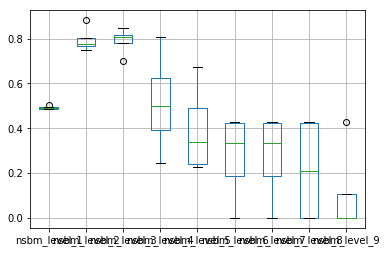

In [111]:
MI_40.iloc[:,0:4].T.boxplot()

# ADATA45

In [24]:
scnsbm.inference.nested_model(adata45,collect_marginals=False)
adata45.write('hworkcovid_10x/adata_45a.h5ad')
scnsbm.inference.nested_model(adata45,collect_marginals=False)
adata45.write('hworkcovid_10x/adata_45b.h5ad')
scnsbm.inference.nested_model(adata45,collect_marginals=False)
adata45.write('hworkcovid_10x/adata_45c.h5ad')
scnsbm.inference.nested_model(adata45,collect_marginals=False)
adata45.write('hworkcovid_10x/adata_45d.h5ad')
scnsbm.inference.nested_model(adata45,collect_marginals=False)
adata45.write('hworkcovid_10x/adata_45e.h5ad')

In [62]:
adata45a=sc.read('hworkcovid_10x/adata_45a.h5ad')
adata45b=sc.read('hworkcovid_10x/adata_45b.h5ad')
adata45c=sc.read('hworkcovid_10x/adata_45c.h5ad')
adata45d=sc.read('hworkcovid_10x/adata_45d.h5ad')
adata45e=sc.read('hworkcovid_10x/adata_45e.h5ad')

### MI_45

In [63]:
nsbm_levels = [x for x in adata45a.obs_keys() if x.startswith("nsbm")]
foobars=['foobar45a','foobar45b','foobar45c','foobar45d','foobar45e']

In [64]:
foobar45a= [sklearn.metrics.adjusted_mutual_info_score(adata45a.obs.loc[:, NL], adata45a.obs.loc[:, 'cell_line'])
                                            for NL in nsbm_levels]
foobar45b= [sklearn.metrics.adjusted_mutual_info_score(adata45b.obs.loc[:, NL], adata45b.obs.loc[:, 'cell_line'])
                                            for NL in nsbm_levels]
foobar45c= [sklearn.metrics.adjusted_mutual_info_score(adata45c.obs.loc[:, NL], adata45c.obs.loc[:, 'cell_line'])
                                            for NL in nsbm_levels]
foobar45d= [sklearn.metrics.adjusted_mutual_info_score(adata45d.obs.loc[:, NL], adata45d.obs.loc[:, 'cell_line'])
                                            for NL in nsbm_levels]
foobar45e= [sklearn.metrics.adjusted_mutual_info_score(adata45e.obs.loc[:, NL], adata45e.obs.loc[:, 'cell_line'])
                                            for NL in nsbm_levels]

/home/morelli/anaconda3/envs/scnsbm/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/morelli/anaconda3/envs/scnsbm/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/morelli/anaconda3/envs/scnsbm/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/morelli/anaconda3/envs/scnsbm/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI wil

In [65]:
MI_45=pd.DataFrame(None,columns=foobars,index=nsbm_levels)
MI_45.loc[:,'foobar45a']=foobar45a
MI_45.loc[:,'foobar45b']=foobar45b
MI_45.loc[:,'foobar45c']=foobar45c
MI_45.loc[:,'foobar45d']=foobar45d
MI_45.loc[:,'foobar45e']=foobar45e

In [75]:
mean_45=[mean(MI_45.iloc[x,:]) for x in range(len(nsbm_levels))]
sd_45=[statistics.stdev(MI_45.iloc[x,:]) for x in range(len(nsbm_levels))]
MI_45['mean_45']=mean_45
MI_45['standard_deviation_45']=sd_45

In [80]:
pickle.dump(MI_45, open('hworkcovid_10x/mi_45.pkl','wb'),2)

In [76]:
MI_45

,foobar45a,foobar45b,foobar45c,foobar45d,foobar45e,mean_45,standard_deviation_45
nsbm_level_1,5.158673e-01,4.975309e-01,4.960001e-01,5.023034e-01,5.085610e-01,5.040526e-01,0.008221
nsbm_level_2,8.941229e-01,7.718521e-01,7.559663e-01,7.136578e-01,8.025545e-01,7.876307e-01,0.067615
nsbm_level_3,6.850207e-01,9.521213e-01,9.521213e-01,6.480192e-01,9.521213e-01,8.378808e-01,0.156976
nsbm_level_4,4.187989e-01,5.622030e-01,7.521372e-01,6.480192e-01,8.458551e-01,6.454027e-01,0.165719
nsbm_level_5,-5.897479e-16,4.187989e-01,6.463557e-01,6.229178e-01,4.240783e-01,4.224302e-01,0.259230
nsbm_level_6,-5.897479e-16,-5.897479e-16,4.240783e-01,6.229178e-01,-5.897479e-16,2.093992e-01,0.295224
nsbm_level_7,-5.897479e-16,-5.897479e-16,-5.897479e-16,4.205332e-01,-5.897479e-16,8.410663e-02,0.188068
nsbm_level_8,-5.897479e-16,-5.897479e-16,-5.897479e-16,-5.897479e-16,-5.897479e-16,-5.897479e-16,0.000000
nsbm_level_9,-5.897479e-16,-5.897479e-16,-5.897479e-16,-5.897479e-16,-5.897479e-16,-5.897479e-16,0.000000


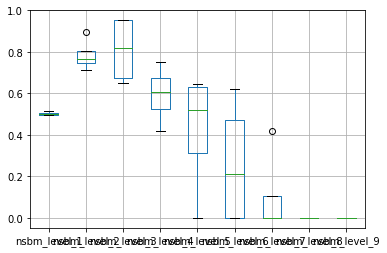

In [112]:
MI_45.iloc[:,0:4].T.boxplot()

# ADATA50

In [25]:
scnsbm.inference.nested_model(adata50,collect_marginals=False)
adata50.write('hworkcovid_10x/adata_50a.h5ad')
scnsbm.inference.nested_model(adata50,collect_marginals=False)
adata50.write('hworkcovid_10x/adata_50b.h5ad')
scnsbm.inference.nested_model(adata50,collect_marginals=False)
adata50.write('hworkcovid_10x/adata_50c.h5ad')
scnsbm.inference.nested_model(adata50,collect_marginals=False)
adata50.write('hworkcovid_10x/adata_50d.h5ad')
scnsbm.inference.nested_model(adata50,collect_marginals=False)
adata50.write('hworkcovid_10x/adata_50e.h5ad')

In [66]:
adata50a=sc.read('hworkcovid_10x/adata_50a.h5ad')
adata50b=sc.read('hworkcovid_10x/adata_50b.h5ad')
adata50c=sc.read('hworkcovid_10x/adata_50c.h5ad')
adata50d=sc.read('hworkcovid_10x/adata_50d.h5ad')
adata50e=sc.read('hworkcovid_10x/adata_50e.h5ad')

### MI_50

In [67]:
nsbm_levels = [x for x in adata50a.obs_keys() if x.startswith("nsbm")]
foobars=['foobar50a','foobar50b','foobar50c','foobar50d','foobar50e']

In [68]:
foobar50a= [sklearn.metrics.adjusted_mutual_info_score(adata50a.obs.loc[:, NL], adata50a.obs.loc[:, 'cell_line'])
                                            for NL in nsbm_levels]
foobar50b= [sklearn.metrics.adjusted_mutual_info_score(adata50b.obs.loc[:, NL], adata50b.obs.loc[:, 'cell_line'])
                                            for NL in nsbm_levels]
foobar50c= [sklearn.metrics.adjusted_mutual_info_score(adata50c.obs.loc[:, NL], adata50c.obs.loc[:, 'cell_line'])
                                            for NL in nsbm_levels]
foobar50d= [sklearn.metrics.adjusted_mutual_info_score(adata50d.obs.loc[:, NL], adata50d.obs.loc[:, 'cell_line'])
                                            for NL in nsbm_levels]
foobar50e= [sklearn.metrics.adjusted_mutual_info_score(adata50e.obs.loc[:, NL], adata50e.obs.loc[:, 'cell_line'])
                                            for NL in nsbm_levels]

/home/morelli/anaconda3/envs/scnsbm/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/morelli/anaconda3/envs/scnsbm/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/morelli/anaconda3/envs/scnsbm/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/morelli/anaconda3/envs/scnsbm/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI wil

In [69]:
MI_50=pd.DataFrame(None,columns=foobars,index=nsbm_levels)
MI_50.loc[:,'foobar50a']=foobar50a
MI_50.loc[:,'foobar50b']=foobar50b
MI_50.loc[:,'foobar50c']=foobar50c
MI_50.loc[:,'foobar50d']=foobar50d
MI_50.loc[:,'foobar50e']=foobar50e

In [70]:
mean_50=[mean(MI_50.iloc[x,:]) for x in range(len(nsbm_levels))]
sd_50=[statistics.stdev(MI_50.iloc[x,:]) for x in range(len(nsbm_levels))]
MI_50['mean_50']=mean_50
MI_50['standard_deviation_50']=sd_50

In [72]:
pickle.dump(MI_50, open('hworkcovid_10x/mi_50.pkl','wb'),2)

In [71]:
MI_50

,foobar50a,foobar50b,foobar50c,foobar50d,foobar50e,mean_50,standard_deviation_50
nsbm_level_1,5.785128e-01,5.424147e-01,0.524344,5.284625e-01,5.282036e-01,0.540387,0.022393
nsbm_level_2,7.717153e-01,7.760706e-01,0.718589,7.058530e-01,6.926532e-01,0.732976,0.038492
nsbm_level_3,9.023716e-01,8.482654e-01,0.938953,8.007043e-01,8.634843e-01,0.870756,0.052717
nsbm_level_4,6.015315e-01,9.521213e-01,0.420533,3.831949e-01,8.634843e-01,0.644173,0.256355
nsbm_level_5,4.282992e-01,7.521372e-01,0.420533,3.831949e-01,5.329082e-01,0.503415,0.149747
nsbm_level_6,4.282992e-01,4.868184e-01,0.420533,3.831949e-01,4.240783e-01,0.428585,0.037204
nsbm_level_7,-5.897479e-16,4.868184e-01,0.420533,3.831949e-01,-5.897479e-16,0.258109,0.238525
nsbm_level_8,-5.897479e-16,1.645890e-01,0.420533,-5.897479e-16,-5.897479e-16,0.117024,0.184027
nsbm_level_9,-5.897479e-16,-5.897479e-16,0.420533,-5.897479e-16,-5.897479e-16,0.084107,0.188068


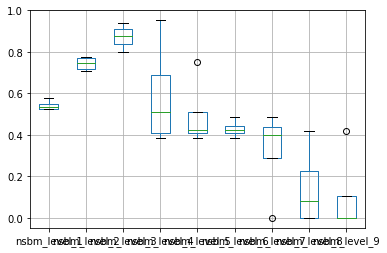

In [113]:
MI_50.iloc[:,0:4].T.boxplot()